In [1]:
!pip install scikit-learn

# Import Libraries

In [2]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as sns  
from scipy import stats  
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
#Code to ignore warnings
import warnings
warnings.filterwarnings("ignore")

# Load the dataset

In [4]:
data=pd.read_csv("hepatitis.csv" , na_values="?")

# Data inspection

In [5]:
data.head()

,ID,target,age,gender,steroid,antivirals,fatigue,malaise,anorexia,liverBig,...,spleen,spiders,ascites,varices,bili,alk,sgot,albu,protime,histology
0,1,2,30,2,1.0,2,2.0,2.0,2.0,1.0,...,2.0,2.0,2.0,2.0,1.0,85.0,18.0,4.0,NaN,1
1,2,2,50,1,1.0,2,1.0,2.0,2.0,1.0,...,2.0,2.0,2.0,2.0,0.9,135.0,42.0,3.5,NaN,1
2,3,2,78,1,2.0,2,1.0,2.0,2.0,2.0,...,2.0,2.0,2.0,2.0,0.7,96.0,32.0,4.0,NaN,1
3,4,2,31,1,NaN,1,2.0,2.0,2.0,2.0,...,2.0,2.0,2.0,2.0,0.7,46.0,52.0,4.0,80.0,1
4,5,2,34,1,2.0,2,2.0,2.0,2.0,2.0,...,2.0,2.0,2.0,2.0,1.0,NaN,200.0,4.0,NaN,1


In [6]:
data.shape

(155, 21)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 21 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   ID          155 non-null    int64  
 1   target      155 non-null    int64  
 2   age         155 non-null    int64  
 3   gender      155 non-null    int64  
 4   steroid     154 non-null    float64
 5   antivirals  155 non-null    int64  
 6   fatigue     154 non-null    float64
 7   malaise     154 non-null    float64
 8   anorexia    154 non-null    float64
 9   liverBig    145 non-null    float64
 10  liverFirm   144 non-null    float64
 11  spleen      150 non-null    float64
 12  spiders     150 non-null    float64
 13  ascites     150 non-null    float64
 14  varices     150 non-null    float64
 15  bili        149 non-null    float64
 16  alk         126 non-null    float64
 17  sgot        151 non-null    float64
 18  albu        139 non-null    float64
 19  protime     88 non-null     f

In [8]:
data.describe()

,ID,target,age,gender,steroid,antivirals,fatigue,malaise,anorexia,liverBig,...,spleen,spiders,ascites,varices,bili,alk,sgot,albu,protime,histology
count,155.000000,155.000000,155.000000,155.000000,154.000000,155.000000,154.000000,154.000000,154.000000,145.000000,...,150.00000,150.000000,150.000000,150.00000,149.000000,126.000000,151.00000,139.000000,88.000000,155.000000
mean,78.000000,1.793548,41.200000,1.103226,1.506494,1.845161,1.350649,1.603896,1.792208,1.827586,...,1.80000,1.660000,1.866667,1.88000,1.427517,105.325397,85.89404,3.817266,61.852273,1.451613
std,44.888751,0.406070,12.565878,0.305240,0.501589,0.362923,0.478730,0.490682,0.407051,0.379049,...,0.40134,0.475296,0.341073,0.32605,1.212149,51.508109,89.65089,0.651523,22.875244,0.499266
min,1.000000,1.000000,7.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.00000,1.000000,1.000000,1.00000,0.300000,26.000000,14.00000,2.100000,0.000000,1.000000
25%,39.500000,2.000000,32.000000,1.000000,1.000000,2.000000,1.000000,1.000000,2.000000,2.000000,...,2.00000,1.000000,2.000000,2.00000,0.700000,74.250000,31.50000,3.400000,46.000000,1.000000
50%,78.000000,2.000000,39.000000,1.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,...,2.00000,2.000000,2.000000,2.00000,1.000000,85.000000,58.00000,4.000000,61.000000,1.000000
75%,116.500000,2.000000,50.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,...,2.00000,2.000000,2.000000,2.00000,1.500000,132.250000,100.50000,4.200000,76.250000,2.000000
max,155.000000,2.000000,78.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,...,2.00000,2.000000,2.000000,2.00000,8.000000,295.000000,648.00000,6.400000,100.000000,2.000000


In [9]:
data.isnull().sum()

ID             0
target         0
age            0
gender         0
steroid        1
antivirals     0
fatigue        1
malaise        1
anorexia       1
liverBig      10
liverFirm     11
spleen         5
spiders        5
ascites        5
varices        5
bili           6
alk           29
sgot           4
albu          16
protime       67
histology      0
dtype: int64

In [10]:
# target live:2, die:1
data.target.value_counts()

target
2    123
1     32
Name: count, dtype: int64

In [11]:
#male: 1 , female:2
data.gender.value_counts()

gender
1    139
2     16
Name: count, dtype: int64

In [12]:
data.dtypes

ID              int64
target          int64
age             int64
gender          int64
steroid       float64
antivirals      int64
fatigue       float64
malaise       float64
anorexia      float64
liverBig      float64
liverFirm     float64
spleen        float64
spiders       float64
ascites       float64
varices       float64
bili          float64
alk           float64
sgot          float64
albu          float64
protime       float64
histology       int64
dtype: object

# Data Visualization

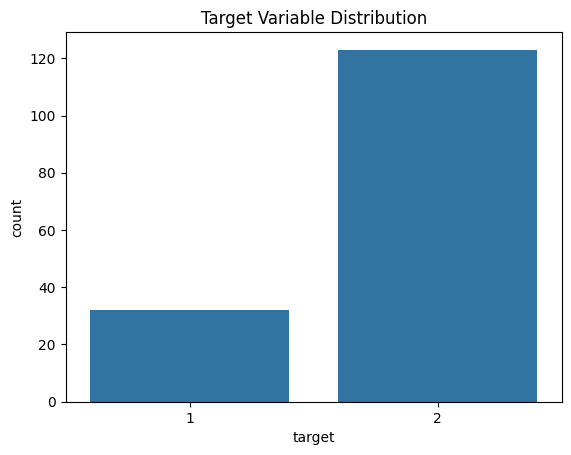

In [13]:
# Target variable distribution
sns.countplot(x='target', data=data)
plt.title('Target Variable Distribution')
plt.show()

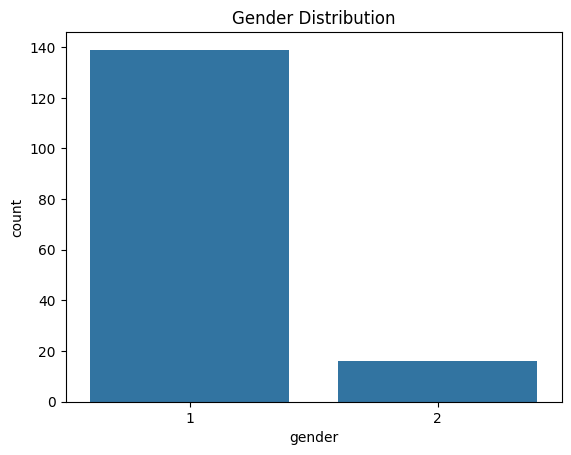

In [14]:
# Gender distribution
sns.countplot(x='gender', data=data)
plt.title('Gender Distribution')
plt.show()


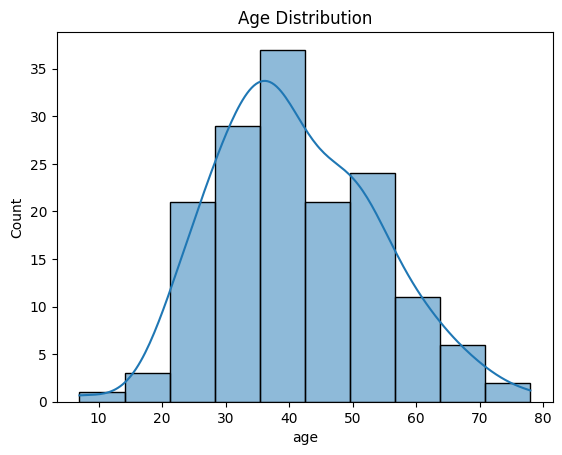

In [15]:
# Age distribution
sns.histplot(data['age'], kde=True, bins=10)
plt.title('Age Distribution')
plt.show()


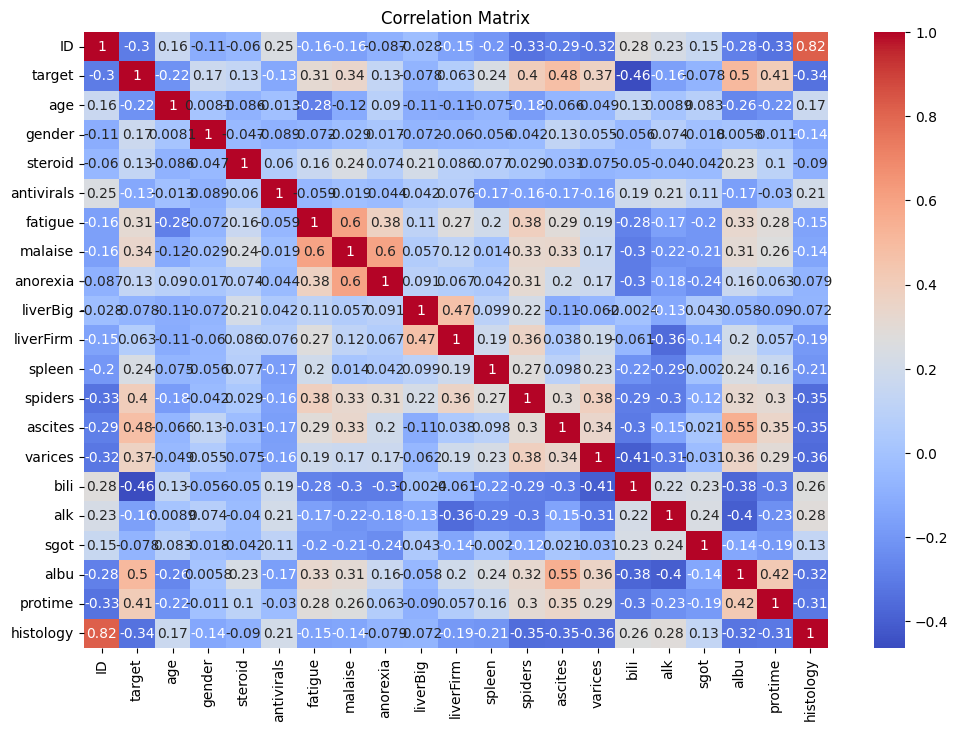

In [16]:
# Correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

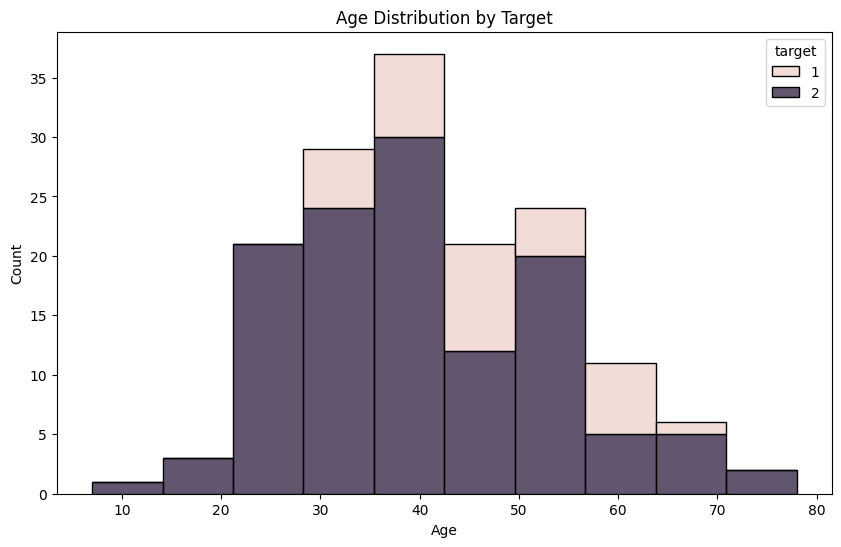

In [17]:
# Age distribution by target
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='age', hue='target', bins=10, multiple='stack')
plt.title('Age Distribution by Target')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()


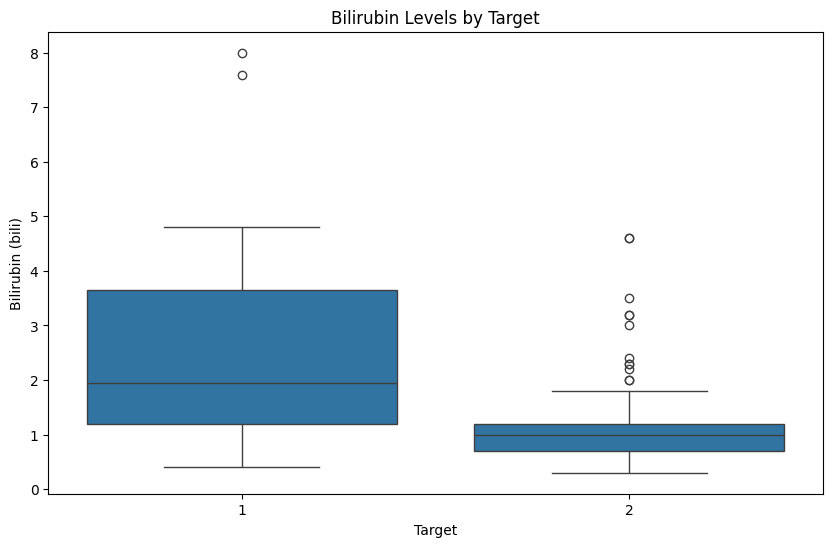

In [18]:
# Bilirubin levels by target
plt.figure(figsize=(10, 6))
sns.boxplot(x='target', y='bili', data=data)
plt.title('Bilirubin Levels by Target')
plt.xlabel('Target')
plt.ylabel('Bilirubin (bili)')
plt.show()


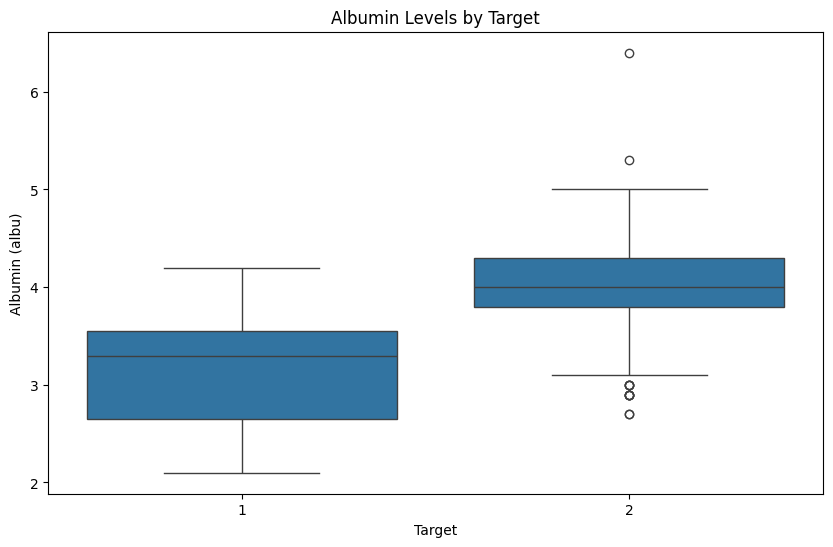

In [19]:
# Albumin levels by target
plt.figure(figsize=(10, 6))
sns.boxplot(x='target', y='albu', data=data)
plt.title('Albumin Levels by Target')
plt.xlabel('Target')
plt.ylabel('Albumin (albu)')
plt.show()


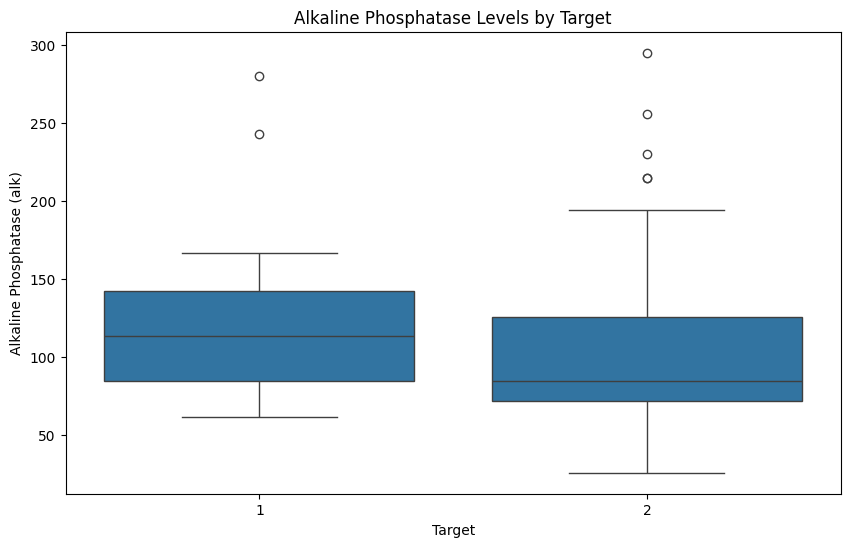

In [20]:
# Alkaline phosphatase levels by target
plt.figure(figsize=(10, 6))
sns.boxplot(x='target', y='alk', data=data)
plt.title('Alkaline Phosphatase Levels by Target')
plt.xlabel('Target')
plt.ylabel('Alkaline Phosphatase (alk)')
plt.show()


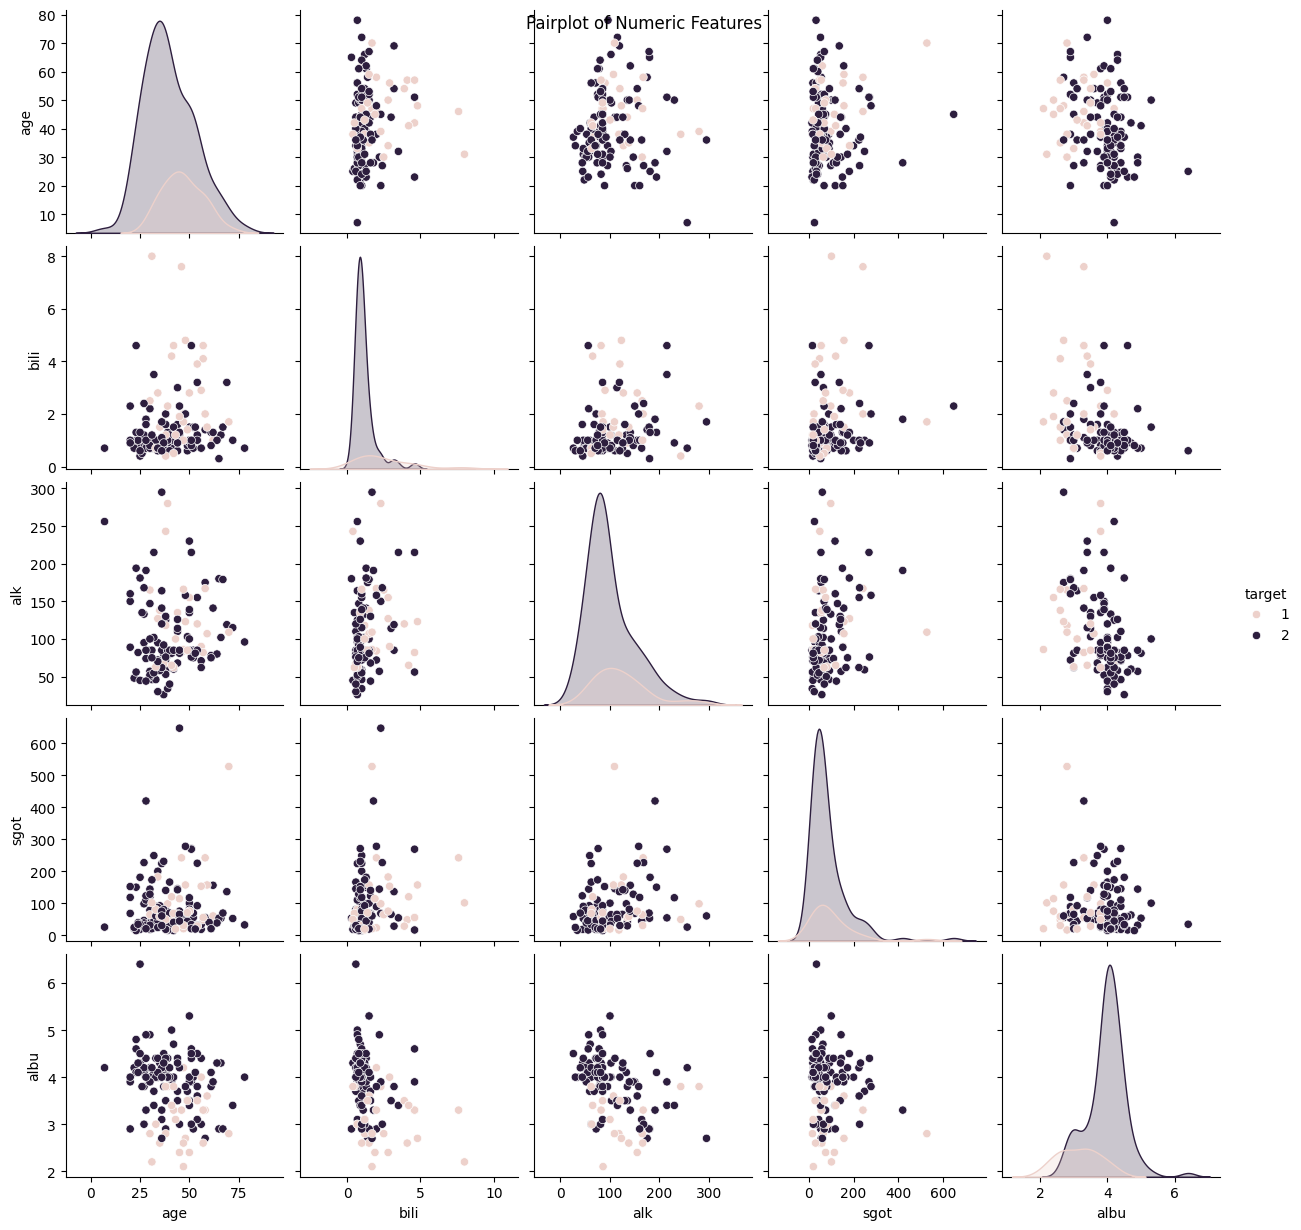

In [21]:
# Pairplot of numeric features
numeric_features = ['age', 'bili', 'alk', 'sgot', 'albu']
sns.pairplot(data, vars=numeric_features, hue='target', diag_kind='kde')
plt.suptitle('Pairplot of Numeric Features')
plt.show()


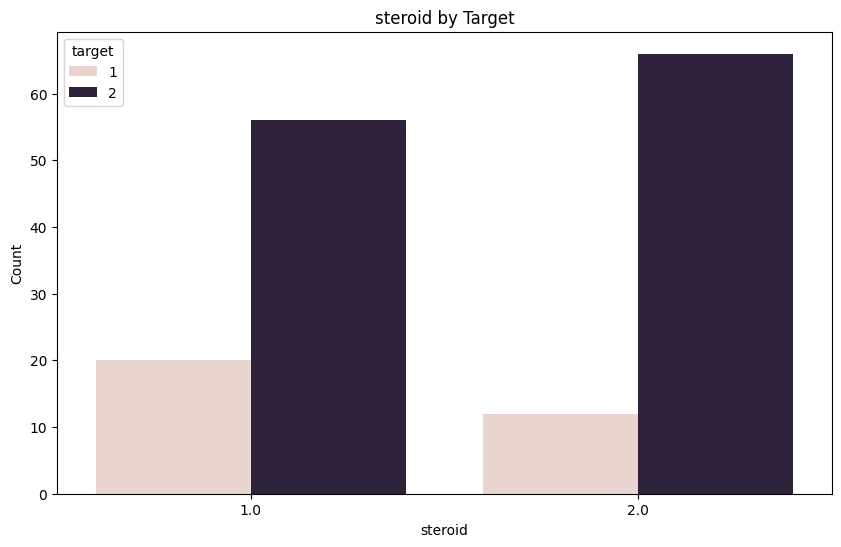

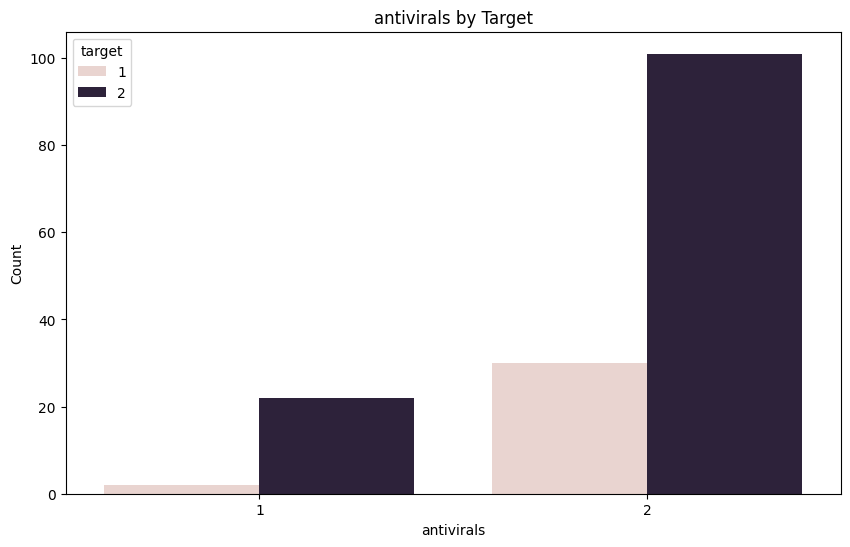

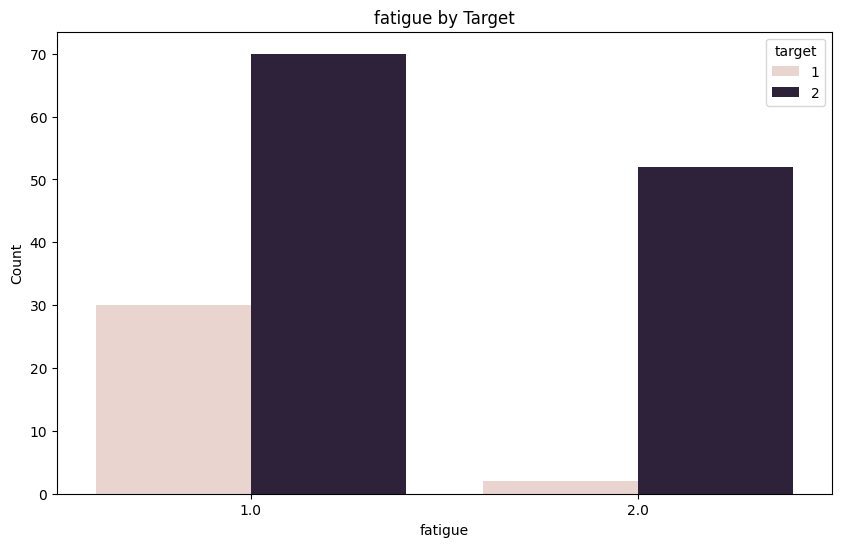

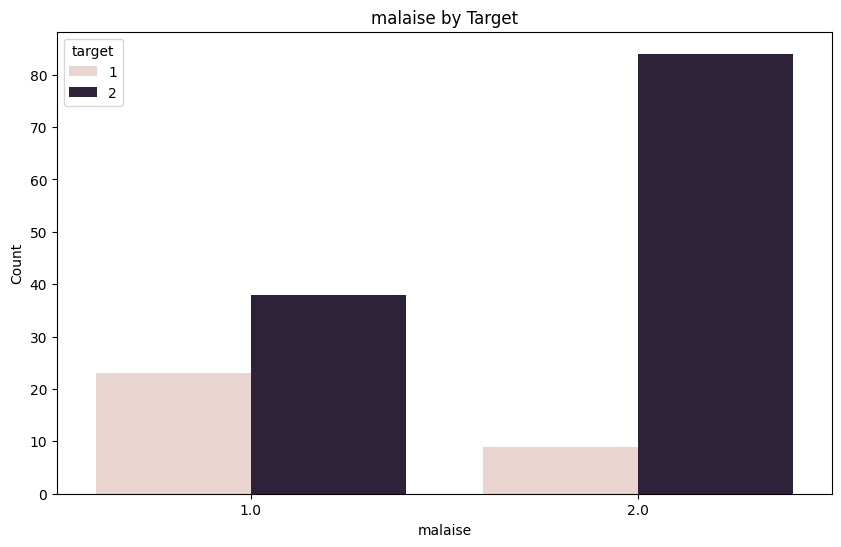

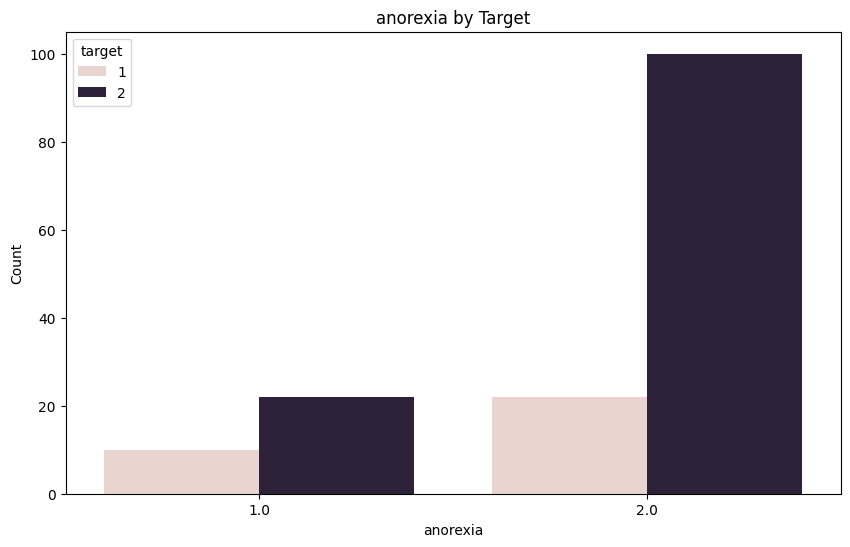

In [22]:
# Distribution of some key categorical features
categorical_features = ['steroid', 'antivirals', 'fatigue', 'malaise', 'anorexia']

for feature in categorical_features:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=feature, hue='target', data=data)
    plt.title(f'{feature} by Target')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.show()

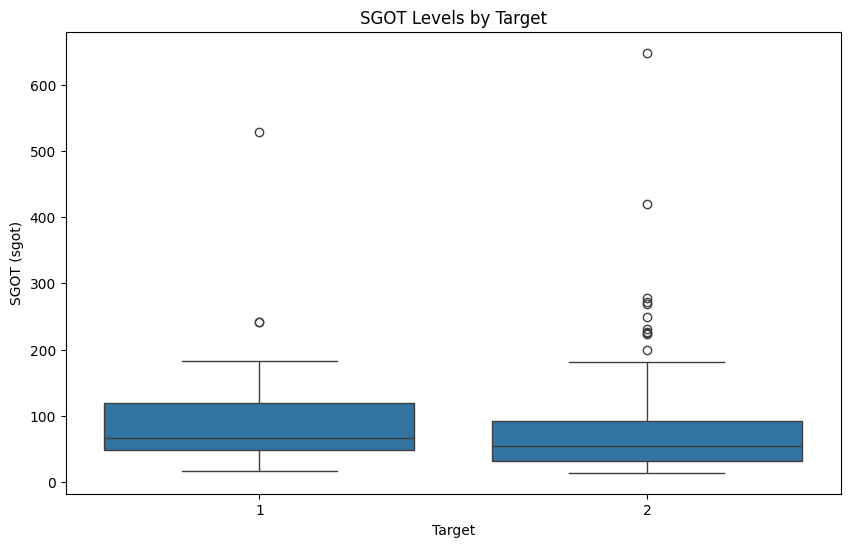

In [23]:
# SGOT levels by target
plt.figure(figsize=(10, 6))
sns.boxplot(x='target', y='sgot', data=data)
plt.title('SGOT Levels by Target')
plt.xlabel('Target')
plt.ylabel('SGOT (sgot)')
plt.show()

In [24]:
numeric_cols = ['bili', 'alk', 'sgot', 'albu', 'protime']
data[numeric_cols] = data[numeric_cols].apply(pd.to_numeric)
# Feature Engineering: Adding binary features for missing values
data['missing_bili'] = data['bili'].isna().astype(int)
data['missing_alk'] = data['alk'].isna().astype(int)
data['missing_sgot'] = data['sgot'].isna().astype(int)
data['missing_albu'] = data['albu'].isna().astype(int)
data['missing_protime'] = data['protime'].isna().astype(int)

# Fill missing numerical values with the median
data[numeric_cols] = data[numeric_cols].fillna(data[numeric_cols].median())


In [25]:
# Define the feature and target
X = data[['age']]  # Using 'age' as the single feature
y = data['bili']   # Using 'bili' as the target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [26]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
# Initialize the model
model = LinearRegression()

# Train the model
model.fit(X_train_scaled, y_train)

# Make predictions
y_train_pred = model.predict(X_train_scaled)
y_test_pred = model.predict(X_test_scaled)

In [27]:
# Calculate MSE and R² for training and testing sets
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

print(f'Training MSE: {train_mse:.2f}')
print(f'Test MSE: {test_mse:.2f}')
print(f'Training R²: {train_r2:.2f}')
print(f'Test R²: {test_r2:.2f}')


Training MSE: 1.31
Test MSE: 1.75
Training R²: 0.03
Test R²: -0.05


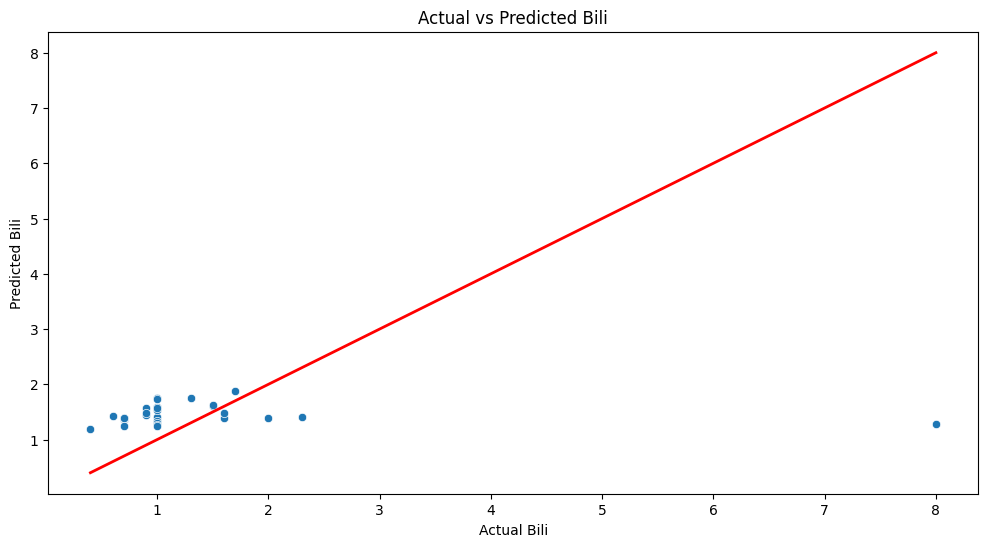

In [28]:
# Plotting the results
plt.figure(figsize=(12, 6))
sns.scatterplot(x=y_test, y=y_test_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r', lw=2)
plt.xlabel('Actual Bili')
plt.ylabel('Predicted Bili')
plt.title('Actual vs Predicted Bili')
plt.show()